In [25]:
import matplotlib.pyplot as plt
import numpy as np
from psm import generate_spectrum,coeff_array
from spectralspace.analysis.empca_residuals import empca_residuals, maskFilter
import spectralspace.sample.access_spectrum as acs
%pylab inline

Populating the interactive namespace from numpy and matplotlib
pylab import has clobbered these variables: ['hist']
`%matplotlib` prevents importing * from pylab and numpy



In [2]:
k = 1.4826
def MAD(arr):
    return k**2*np.ma.median((arr-np.ma.median(arr))**2)

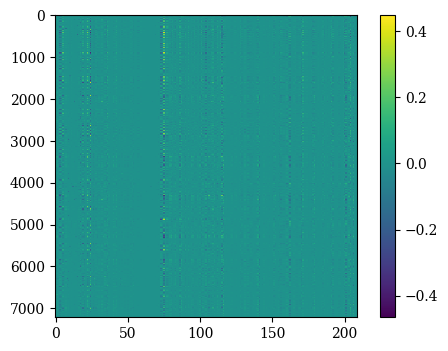

In [9]:
plt.imshow(coeff_array,aspect=coeff_array.shape[1]/float(coeff_array.shape[0]))
plt.colorbar()

1.04069937311e-05 0.0
4.8574260183e-05 1.77346313118e-34


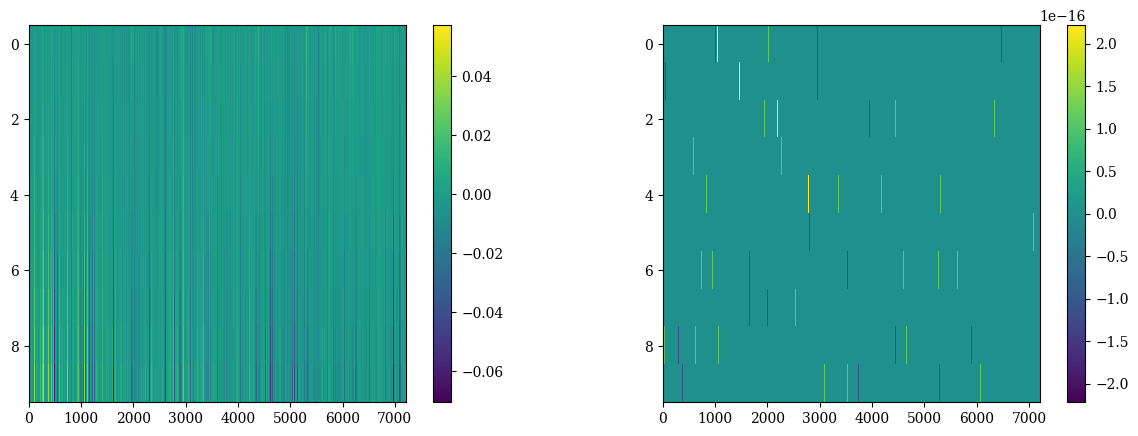

In [64]:
Teffspr = np.arange(4.5,5.0,0.05)
loggspr = np.linspace(2.5,2.7,len(Teffspr))
chs = np.linspace(-0.3,0.1,len(Teffspr))
partspecs = np.zeros((len(Teffspr),7214))
linspecs = np.zeros((len(Teffspr),7214))
quadspecs = np.zeros((len(Teffspr),7214))
for i in range(len(Teffspr)):
    partspecs[i] = generate_spectrum(Teff=Teffspr[i],logg=loggspr[i],feh=0.1,order=1.5)#,ch=chs[i])
    quadspecs[i] = generate_spectrum(Teff=Teffspr[i],logg=loggspr[i],feh=0.1,order=2)#,ch=chs[i])
    linspecs[i] = generate_spectrum(Teff=Teffspr[i],logg=loggspr[i],feh=0.1,order=1)#,ch=chs[i])
 
diff2 = quadspecs-partspecs
diff1 = quadspecs-linspecs
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(diff1,aspect=diff1.shape[1]/float(diff1.shape[0]))#,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.subplot(122)
plt.imshow(diff2,aspect=diff2.shape[1]/float(diff2.shape[0]))#,vmin=-0.1,vmax=0.1)
plt.colorbar()
print MAD(diff1), MAD(diff2)
print np.var(diff1), np.var(diff2)

In [10]:
rcdist_sample = empca_residuals('apogee','red_clump',maskFilter,ask=True,
                                badcombpixmask=7935,
                                datadir='/geir_data/scr/price-jones/Data/apogee_dim_reduction')

Which data release? (Enter for 12): 
properties  ['DR', 'EMPCA_wrapper', 'R2compare', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_basicStructure', '_dataSource', '_getProperties', '_match', '_sampleInfo', '_sampleType', 'applyMask', 'checkArrays', 'continuumNormalize', 'correctUncertainty', 'data', 'directoryClean', 'filterCopy', 'findCorrection', 'findFit', 'findResiduals', 'fitStatistic', 'func_sort', 'getDirectory', 'imshow', 'initArrays', 'logplot', 'makeArrays', 'makeMatrix', 'multiFit', 'numberStars', 'pixelEMPCA', 'plotHistogram', 'plot_example_fit', 'resizePixelEigvec', 'sample_wrapper', 'samplesplit', 'setDeltaR2', 'setR2', 'setR2noise', 'show_sample_coverage', 'uncorrectUncertainty']
Type done at any prompt when finished
Data key: TEFG
Got a bad key. Try choosing one of

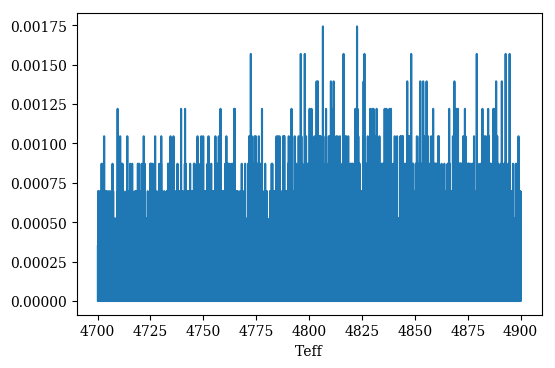

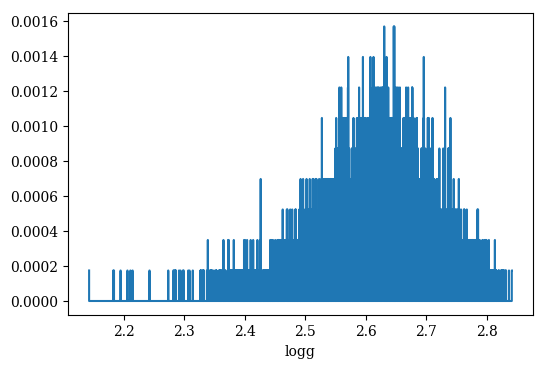

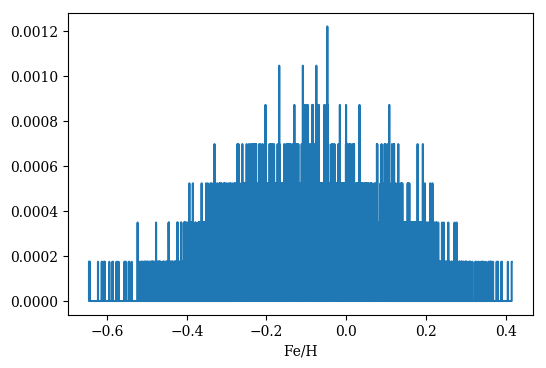

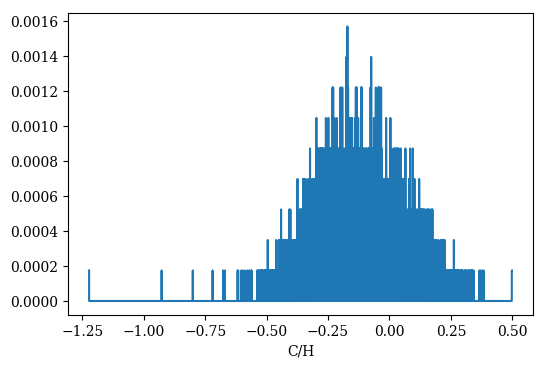

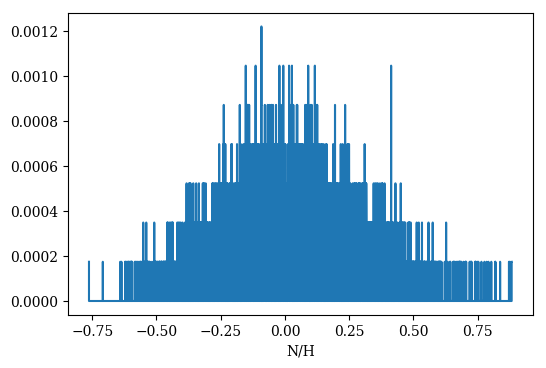

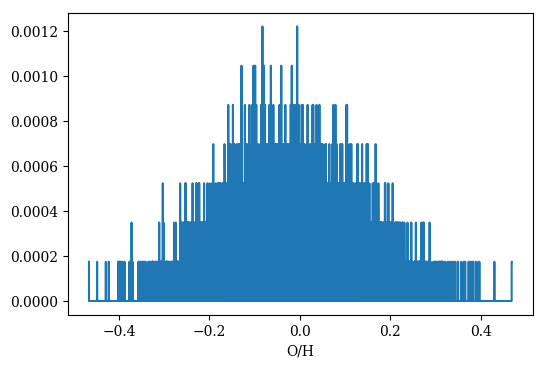

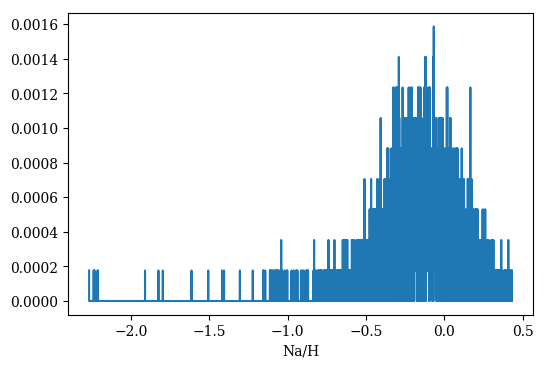

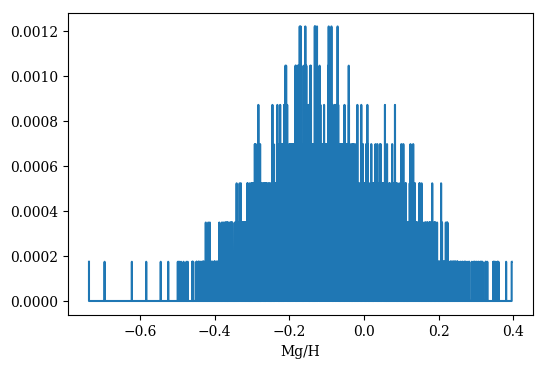

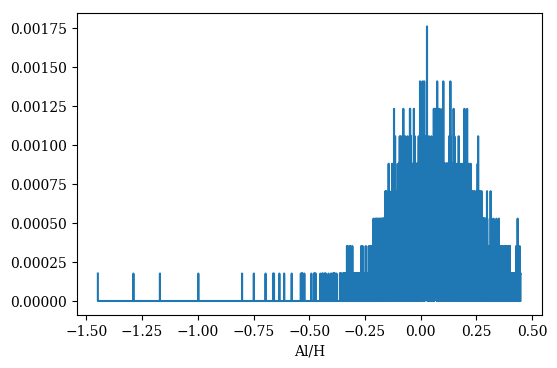

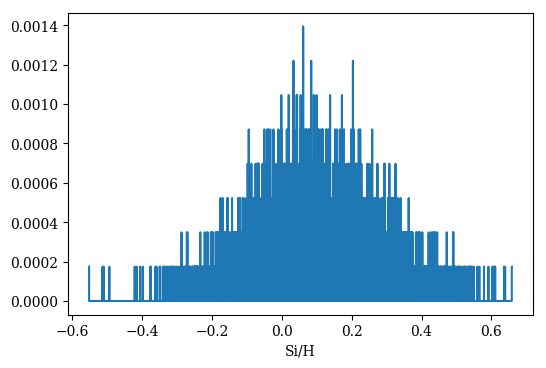

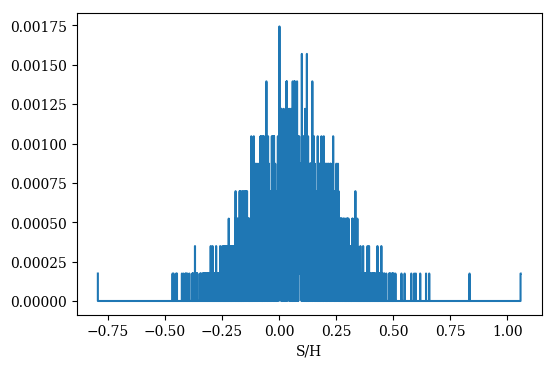

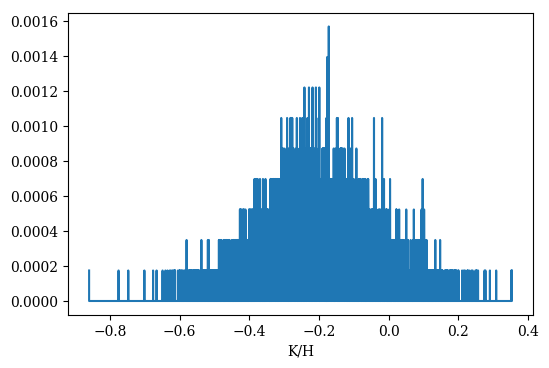

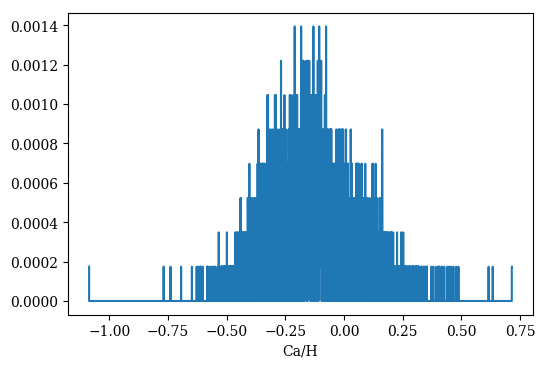

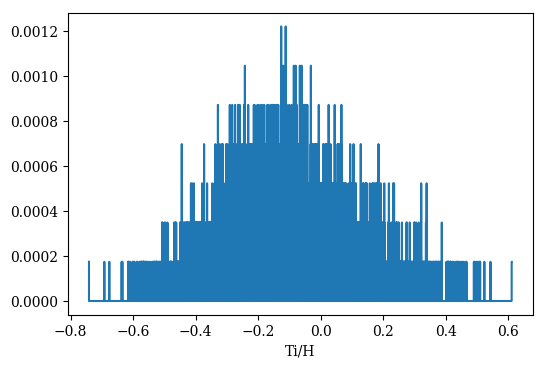

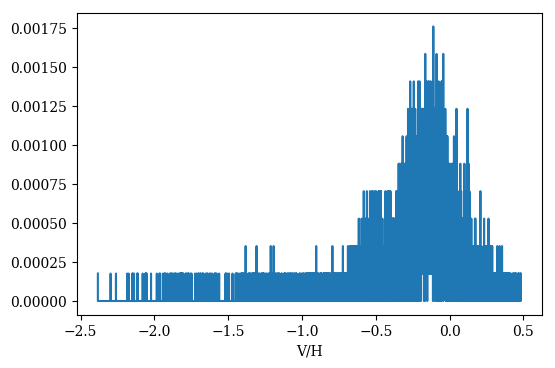

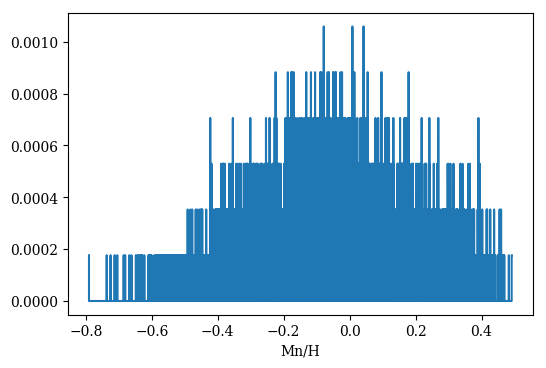

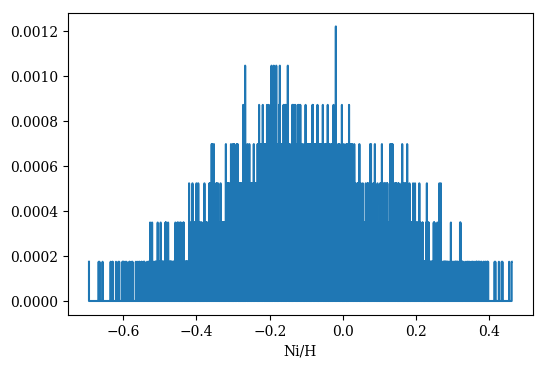

In [11]:
Nbins = 10000
hist,binEdges = np.histogram(rcdist_sample.teff,bins=Nbins,density=True)
tempprobs = hist/np.sum(hist)
tempchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(tempchoices,tempprobs)
plt.xlabel('Teff')

hist,binEdges = np.histogram(rcdist_sample.logg,bins=Nbins,density=True)
loggprobs = hist/np.sum(hist)
loggchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(loggchoices,loggprobs)
plt.xlabel('logg')

hist,binEdges = np.histogram(rcdist_sample.fe_h,bins=Nbins,density=True)
fe_hprobs = hist/np.sum(hist)
fe_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(fe_hchoices,fe_hprobs)
plt.xlabel('Fe/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['C_H'][rcdist_sample.matchingData['C_H']!=-9999],bins=Nbins,density=True)
c_hprobs = hist/np.sum(hist)
c_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(c_hchoices,c_hprobs)
plt.xlabel('C/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['N_H'][rcdist_sample.matchingData['N_H']!=-9999],bins=Nbins,density=True)
n_hprobs = hist/np.sum(hist)
n_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(n_hchoices,n_hprobs)
plt.xlabel('N/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['O_H'][rcdist_sample.matchingData['O_H']!=-9999],bins=Nbins,density=True)
o_hprobs = hist/np.sum(hist)
o_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(o_hchoices,o_hprobs)
plt.xlabel('O/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['NA_H'][rcdist_sample.matchingData['NA_H']!=-9999],bins=Nbins,density=True)
na_hprobs = hist/np.sum(hist)
na_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(na_hchoices,na_hprobs)
plt.xlabel('Na/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['MG_H'][rcdist_sample.matchingData['MG_H']!=-9999],bins=Nbins,density=True)
mg_hprobs = hist/np.sum(hist)
mg_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(mg_hchoices,mg_hprobs)
plt.xlabel('Mg/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['AL_H'][rcdist_sample.matchingData['AL_H']!=-9999],bins=Nbins,density=True)
al_hprobs = hist/np.sum(hist)
al_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(al_hchoices,al_hprobs)
plt.xlabel('Al/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['SI_H'][rcdist_sample.matchingData['SI_H']!=-9999],bins=Nbins,density=True)
si_hprobs = hist/np.sum(hist)
si_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(si_hchoices,si_hprobs)
plt.xlabel('Si/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['S_H'][rcdist_sample.matchingData['S_H']!=-9999],bins=Nbins,density=True)
s_hprobs = hist/np.sum(hist)
s_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(s_hchoices,s_hprobs)
plt.xlabel('S/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['K_H'][rcdist_sample.matchingData['K_H']!=-9999],bins=Nbins,density=True)
k_hprobs = hist/np.sum(hist)
k_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(k_hchoices,k_hprobs)
plt.xlabel('K/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['CA_H'][rcdist_sample.matchingData['CA_H']!=-9999],bins=Nbins,density=True)
ca_hprobs = hist/np.sum(hist)
ca_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(ca_hchoices,ca_hprobs)
plt.xlabel('Ca/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['TI_H'][rcdist_sample.matchingData['TI_H']!=-9999],bins=Nbins,density=True)
ti_hprobs = hist/np.sum(hist)
ti_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(ti_hchoices,ti_hprobs)
plt.xlabel('Ti/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['V_H'][rcdist_sample.matchingData['V_H']!=-9999],bins=Nbins,density=True)
v_hprobs = hist/np.sum(hist)
v_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(v_hchoices,v_hprobs)
plt.xlabel('V/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['MN_H'][rcdist_sample.matchingData['MN_H']!=-9999],bins=Nbins,density=True)
mn_hprobs = hist/np.sum(hist)
mn_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(mn_hchoices,mn_hprobs)
plt.xlabel('Mn/H')

hist,binEdges = np.histogram(rcdist_sample.matchingData['NI_H'][rcdist_sample.matchingData['NI_H']!=-9999],bins=Nbins,density=True)
ni_hprobs = hist/np.sum(hist)
ni_hchoices =  (2*binEdges-np.roll(binEdges,1))[1:]
plt.figure()
plt.step(ni_hchoices,ni_hprobs)
plt.xlabel('Ni/H')

(9.0916349606003626e-06, 4.6178326057580841e-05)

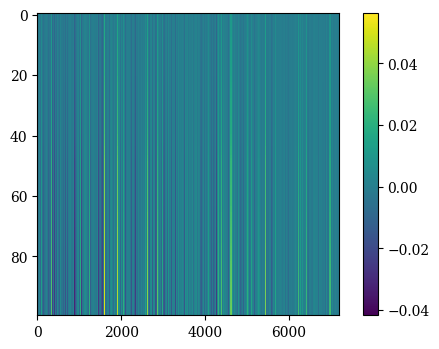

In [12]:
Nstars = 100
linspecs = np.zeros((Nstars,7214))
quadspecs = np.zeros((Nstars,7214))
teffs = np.random.choice(tempchoices,size=Nstars,p=tempprobs)
for i in range(Nstars):
    linspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,order=1)
    quadspecs[i] = generate_spectrum(Teff=teffs[i]/1000.)
diffspec = linspecs-quadspecs
Tsort = np.argsort(teffs)
plt.imshow(diffspec[Tsort],aspect=diffspec.shape[1]/float(diffspec.shape[0]))
plt.colorbar()
MAD(diffspec), np.var(diffspec)

(9.3226431001294846e-06, 4.1324585372983491e-05)

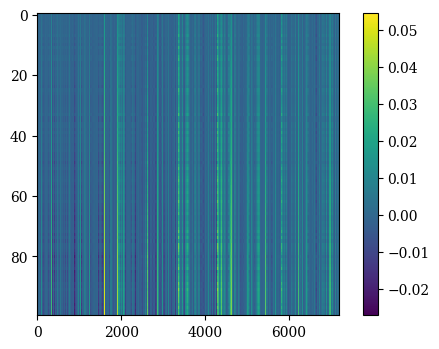

In [13]:
Nstars = 100
linspecs = np.zeros((Nstars,7214))
quadspecs = np.zeros((Nstars,7214))
teffs = np.random.choice(tempchoices,size=Nstars,p=tempprobs)
loggs = np.random.choice(loggchoices,size=Nstars,p=loggprobs)
for i in range(Nstars):
    linspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i],order=1)
    quadspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i])
diffspec = linspecs-quadspecs
Tsort = np.argsort(teffs)
plt.imshow(diffspec[Tsort],aspect=diffspec.shape[1]/float(diffspec.shape[0]))
plt.colorbar()
MAD(diffspec), np.var(diffspec)

(1.0870783020569517e-05, 4.5686953820128636e-05)

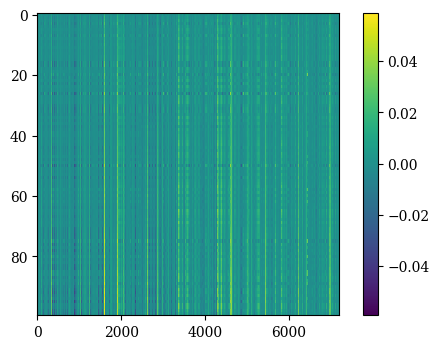

In [14]:
Nstars = 100
linspecs = np.zeros((Nstars,7214))
quadspecs = np.zeros((Nstars,7214))
teffs = np.random.choice(tempchoices,size=Nstars,p=tempprobs)
loggs = np.random.choice(loggchoices,size=Nstars,p=loggprobs)
fe_hs = np.random.choice(fe_hchoices,size=Nstars,p=fe_hprobs)
for i in range(Nstars):
    linspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i],feh=fe_hs[i],order=1)
    quadspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i],feh=fe_hs[i])
diffspec = linspecs-quadspecs
Tsort = np.argsort(teffs)
plt.imshow(diffspec[Tsort],aspect=diffspec.shape[1]/float(diffspec.shape[0]))
plt.colorbar()
MAD(diffspec), np.var(diffspec)

4.04923613351e-05 3.33335180117e-05
0.000154015473047 0.000152304453278


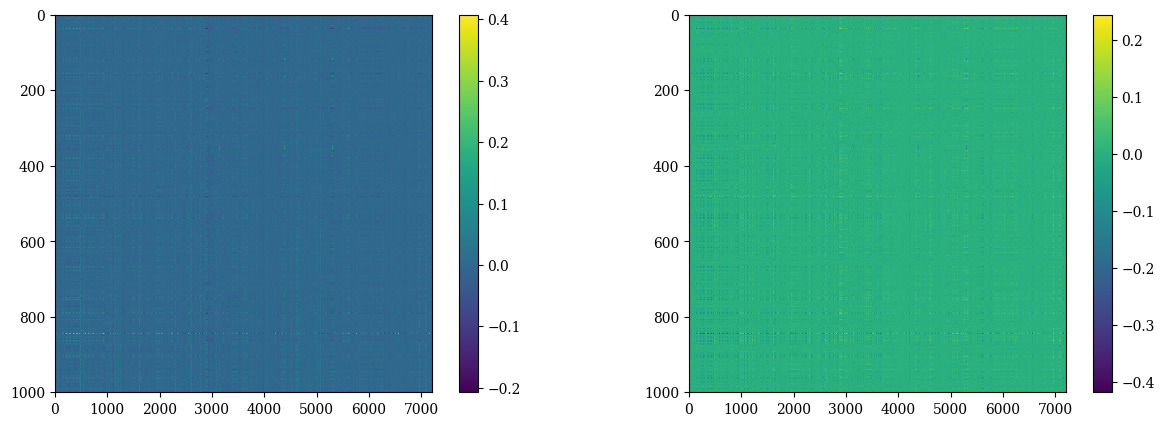

In [21]:
Nstars = 1000
linspecs = np.zeros((Nstars,7214))
quadspecs = np.zeros((Nstars,7214))
teffs = np.random.choice(tempchoices,size=Nstars,p=tempprobs)
loggs = np.random.choice(loggchoices,size=Nstars,p=loggprobs)
fe_hs = np.random.choice(fe_hchoices,size=Nstars,p=fe_hprobs)
c_hs = np.random.choice(c_hchoices,size=Nstars,p=c_hprobs)
n_hs = np.random.choice(n_hchoices,size=Nstars,p=n_hprobs)
o_hs = np.random.choice(o_hchoices,size=Nstars,p=o_hprobs)
na_hs = np.random.choice(na_hchoices,size=Nstars,p=na_hprobs)
mg_hs = np.random.choice(mg_hchoices,size=Nstars,p=mg_hprobs)
al_hs = np.random.choice(al_hchoices,size=Nstars,p=al_hprobs)
si_hs = np.random.choice(si_hchoices,size=Nstars,p=si_hprobs)
s_hs = np.random.choice(s_hchoices,size=Nstars,p=s_hprobs)
k_hs = np.random.choice(k_hchoices,size=Nstars,p=k_hprobs)
ca_hs = np.random.choice(ca_hchoices,size=Nstars,p=ca_hprobs)
ti_hs = np.random.choice(ti_hchoices,size=Nstars,p=ti_hprobs)
v_hs = np.random.choice(v_hchoices,size=Nstars,p=v_hprobs)
mn_hs = np.random.choice(mn_hchoices,size=Nstars,p=mn_hprobs)
ni_hs = np.random.choice(ni_hchoices,size=Nstars,p=ni_hprobs)

for i in range(Nstars):
    linspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i],feh=fe_hs[i],ch=c_hs[i],
                                    nh=n_hs[i],oh=o_hs[i],nah=na_hs[i],mgh=mg_hs[i],
                                    alh=al_hs[i],sih=si_hs[i],sh=s_hs[i],kh=k_hs[i],
                                    cah=ca_hs[i],tih=ti_hs[i],vh=v_hs[i],mnh=mn_hs[i],
                                    nih=ni_hs[i],order=1)
    quadspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i],feh=fe_hs[i],ch=c_hs[i],
                                    nh=n_hs[i],oh=o_hs[i],nah=na_hs[i],mgh=mg_hs[i],
                                    alh=al_hs[i],sih=si_hs[i],sh=s_hs[i],kh=k_hs[i],
                                    cah=ca_hs[i],tih=ti_hs[i],vh=v_hs[i],mnh=mn_hs[i],
                                    nih=ni_hs[i],order=2)
    partspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i],feh=fe_hs[i],ch=c_hs[i],
                                    nh=n_hs[i],oh=o_hs[i],nah=na_hs[i],mgh=mg_hs[i],
                                    alh=al_hs[i],sih=si_hs[i],sh=s_hs[i],kh=k_hs[i],
                                    cah=ca_hs[i],tih=ti_hs[i],vh=v_hs[i],mnh=mn_hs[i],
                                    nih=ni_hs[i],order=1.5)
diffspec1 = linspecs-quadspecs
diffspec2 = quadspecs-partspecs
Tsort = np.argsort(teffs)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(diffspec1[Tsort],aspect=diffspec1.shape[1]/float(diffspec1.shape[0]))
plt.colorbar()
plt.subplot(122)
plt.imshow(diffspec2[Tsort],aspect=diffspec2.shape[1]/float(diffspec2.shape[0]))
plt.colorbar()
print MAD(diffspec1), MAD(diffspec2)
print np.var(diffspec1), np.var(diffspec2)

In [27]:
import spectralspace.analysis.empca_residuals as empcares
import sys
sys.modules['empca_residuals'] = empcares
datadir = '/geir_data/scr/price-jones/Data/apogee_dim_reduction'
direcs = ['{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir)]
subrcmodelMAD = np.load('{0}/eig20_minSNR50_corrNone_meanMed.pkl'.format(direcs[0]))
subrcmodelvar = acs.pklread('{0}/eig20_minSNR50_corrNone_var.pkl'.format(direcs[0]))

In [28]:
subrcmodelMAD.Vdata,subrcmodelvar.Vdata

(5.3356838854822541e-05, 9.1667662342498422e-05)

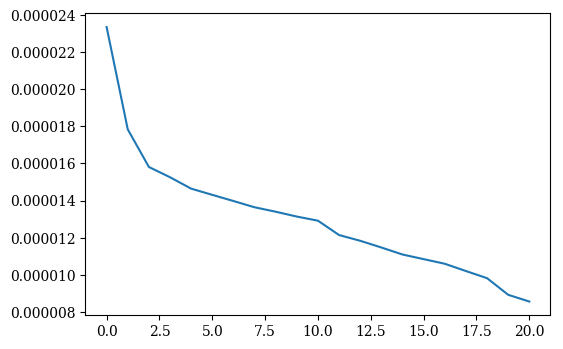

In [33]:
Vmodel = subrcmodelMAD.Vdata*(1-subrcmodelMAD.R2Array)
plt.plot(Vmodel-3e-5)

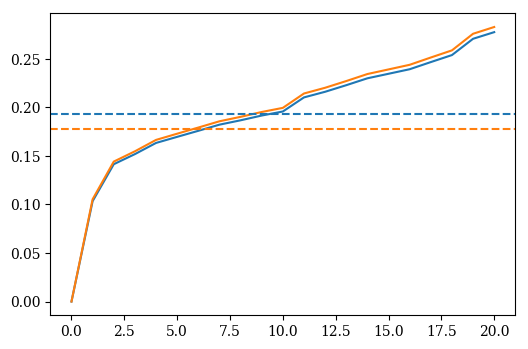

In [49]:
plt.plot(subrcmodelMAD.R2Array)
fitvar = 1e-6
newR2 = 1-((Vmodel-fitvar)/(subrcmodelMAD.Vdata-fitvar))
plt.plot(newR2)
Vnoise = subrcmodelMAD.Vdata*(1-subrcmodelMAD.R2noise)
newnoise = 1-((Vnoise)/(subrcmodelMAD.Vdata-fitvar))
plt.axhline(subrcmodelMAD.R2noise,color='C0',ls='--')
plt.axhline(newnoise,color='C1',ls='--')

6.42415063936e-05 5.36826766567e-05
0.000262372581882 0.0002221768816


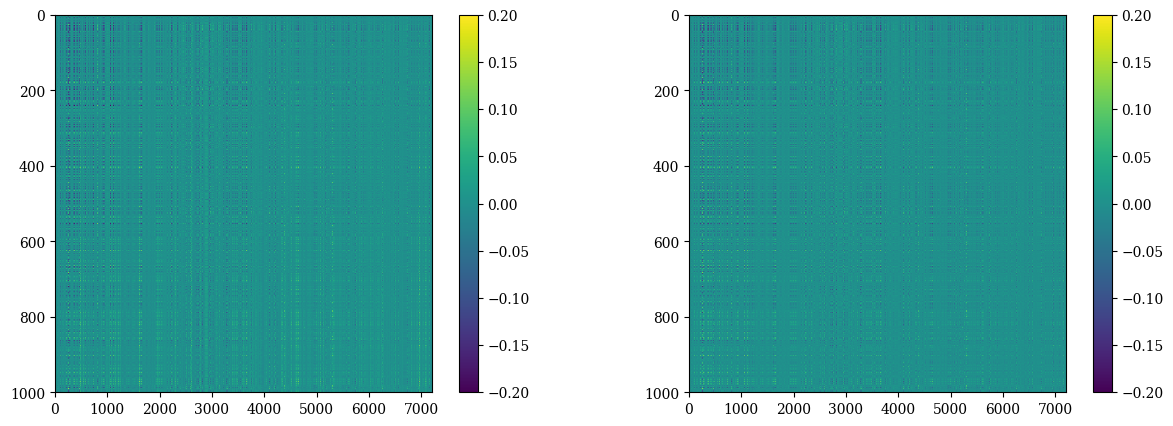

In [22]:
Nstars = 1000

inds = np.random.randint(0,high=rcdist_sample.numberStars(),size=Nstars)

teffs = rcdist_sample.teff[inds]
teffs[teffs==-9999] = np.median(teffs[teffs!=-9999])
loggs = rcdist_sample.logg[inds]
loggs[loggs==-9999] = np.median(loggs[loggs!=-9999])
fe_hs = rcdist_sample.fe_h[inds]
fe_hs[fe_hs==-9999] = np.median(fe_hs[fe_hs!=-9999])
c_hs = rcdist_sample.c_h[inds]
c_hs[c_hs==-9999] = np.median(c_hs[c_hs!=-9999])
n_hs = rcdist_sample.n_h[inds]
n_hs[n_hs==-9999] = np.median(n_hs[n_hs!=-9999])
o_hs = rcdist_sample.o_h[inds]
o_hs[o_hs==-9999] = np.median(o_hs[o_hs!=-9999])
na_hs = rcdist_sample.data['NA_H'][inds]
na_hs[na_hs==-9999] = np.median(na_hs[na_hs!=-9999])
mg_hs = rcdist_sample.data['MG_H'][inds]
mg_hs[mg_hs==-9999] = np.median(mg_hs[mg_hs!=-9999])
al_hs = rcdist_sample.data['AL_H'][inds]
al_hs[al_hs==-9999] = np.median(al_hs[al_hs!=-9999])
si_hs = rcdist_sample.data['SI_H'][inds]
si_hs[si_hs==-9999] = np.median(si_hs[si_hs!=-9999])
s_hs = rcdist_sample.data['S_H'][inds]
s_hs[s_hs==-9999] = np.median(s_hs[s_hs!=-9999])
k_hs = rcdist_sample.data['K_H'][inds]
k_hs[k_hs==-9999] = np.median(k_hs[k_hs!=-9999])
ca_hs = rcdist_sample.data['CA_H'][inds]
ca_hs[ca_hs==-9999] = np.median(ca_hs[ca_hs!=-9999])
ti_hs = rcdist_sample.data['TI_H'][inds]
ti_hs[ti_hs==-9999] = np.median(ti_hs[ti_hs!=-9999])
v_hs = rcdist_sample.data['V_H'][inds]
v_hs[v_hs==-9999] = np.median(v_hs[v_hs!=-9999])
mn_hs = rcdist_sample.data['MN_H'][inds]
mn_hs[mn_hs==-9999] = np.median(mn_hs[mn_hs!=-9999])
ni_hs = rcdist_sample.data['NI_H'][inds]
ni_hs[ni_hs==-9999] = np.median(ni_hs[ni_hs!=-9999])

linspecs = np.zeros((Nstars,7214))
quadspecs = np.zeros((Nstars,7214))
partspecs = np.zeros((Nstars,7214))

for i in range(Nstars):
    linspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i],feh=fe_hs[i],ch=c_hs[i],
                                    nh=n_hs[i],oh=o_hs[i],nah=na_hs[i],mgh=mg_hs[i],
                                    alh=al_hs[i],sih=si_hs[i],sh=s_hs[i],kh=k_hs[i],
                                    cah=ca_hs[i],tih=ti_hs[i],vh=v_hs[i],mnh=mn_hs[i],
                                    nih=ni_hs[i],order=1)
    partspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i],feh=fe_hs[i],ch=c_hs[i],
                                    nh=n_hs[i],oh=o_hs[i],nah=na_hs[i],mgh=mg_hs[i],
                                    alh=al_hs[i],sih=si_hs[i],sh=s_hs[i],kh=k_hs[i],
                                    cah=ca_hs[i],tih=ti_hs[i],vh=v_hs[i],mnh=mn_hs[i],
                                    nih=ni_hs[i],order=1.5)
    quadspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i],feh=fe_hs[i])
Tsort = np.argsort(teffs)
plt.figure(figsize=(15,5))
plt.subplot(121)
diffspec1 = linspecs-quadspecs
plt.imshow(diffspec1[Tsort],aspect=diffspec1.shape[1]/float(diffspec1.shape[0]),vmin=-0.2,vmax=0.2)
plt.colorbar()
plt.subplot(122)
diffspec2 = partspecs-quadspecs
plt.imshow(diffspec2[Tsort],aspect=diffspec2.shape[1]/float(diffspec2.shape[0]),vmin=-0.2,vmax=0.2)
plt.colorbar()
print MAD(diffspec1), MAD(diffspec2)
print np.var(diffspec1), np.var(diffspec2)


MEAN  -0.000196405657935 -0.00160048048158
MEDIAN  0.000357645336737 -0.000860014918875
MAD  9.56261697643e-06 1.08008768285e-05
VARIANCE  1.68399827047e-05 1.44684359633e-05


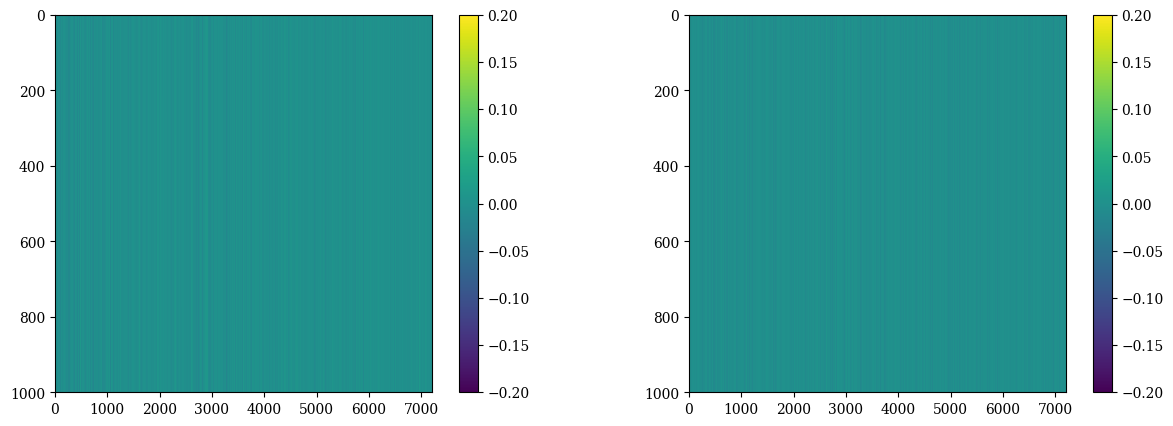

In [66]:
Nstars = 1000
sig = 1e-7
teffs = np.random.uniform(low=4700.,high=4750.,size=Nstars)
loggs = sig*np.random.randn(Nstars)+2.62
fe_hs = sig*np.random.randn(Nstars)-0.09
c_hs = sig*np.random.randn(Nstars)-0.139 
n_hs = sig*np.random.randn(Nstars)+0.018
o_hs = sig*np.random.randn(Nstars)-0.025
na_hs = sig*np.random.randn(Nstars)-0.131
mg_hs = sig*np.random.randn(Nstars)-0.121
al_hs = sig*np.random.randn(Nstars)+0.036
si_hs = sig*np.random.randn(Nstars)+0.095
s_hs = sig*np.random.randn(Nstars)+0.028
k_hs = sig*np.random.randn(Nstars)-0.235
ca_hs = sig*np.random.randn(Nstars)-0.143
ti_hs = sig*np.random.randn(Nstars)-0.147
v_hs = sig*np.random.randn(Nstars)-0.180
mn_hs = sig*np.random.randn(Nstars)-0.093
ni_hs = sig*np.random.randn(Nstars)-0.154

linspecs = np.zeros((Nstars,7214))
quadspecs = np.zeros((Nstars,7214))
partspecs = np.zeros((Nstars,7214))

for i in range(Nstars):
    linspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i],feh=fe_hs[i],ch=c_hs[i],
                                    nh=n_hs[i],oh=o_hs[i],nah=na_hs[i],mgh=mg_hs[i],
                                    alh=al_hs[i],sih=si_hs[i],sh=s_hs[i],kh=k_hs[i],
                                    cah=ca_hs[i],tih=ti_hs[i],vh=v_hs[i],mnh=mn_hs[i],
                                    nih=ni_hs[i],order=1)
    partspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i],feh=fe_hs[i],ch=c_hs[i],
                                    nh=n_hs[i],oh=o_hs[i],nah=na_hs[i],mgh=mg_hs[i],
                                    alh=al_hs[i],sih=si_hs[i],sh=s_hs[i],kh=k_hs[i],
                                    cah=ca_hs[i],tih=ti_hs[i],vh=v_hs[i],mnh=mn_hs[i],
                                    nih=ni_hs[i],order=1.5)
    quadspecs[i] = generate_spectrum(Teff=teffs[i]/1000.,logg=loggs[i],feh=fe_hs[i])
Tsort = np.argsort(teffs)
plt.figure(figsize=(15,5))
plt.subplot(121)
diffspec1 = linspecs-quadspecs
plt.imshow(diffspec1[Tsort],aspect=diffspec1.shape[1]/float(diffspec1.shape[0]),vmin=-0.2,vmax=0.2)
plt.colorbar()
plt.subplot(122)
diffspec2 = partspecs-quadspecs
plt.imshow(diffspec2[Tsort],aspect=diffspec2.shape[1]/float(diffspec2.shape[0]),vmin=-0.2,vmax=0.2)
plt.colorbar()
print 'MEAN ', np.mean(diffspec1), np.mean(diffspec2)
print 'MEDIAN ', np.median(diffspec1), np.median(diffspec2)
print 'MAD ', MAD(diffspec1), MAD(diffspec2)
print 'VARIANCE ', np.var(diffspec1), np.var(diffspec2)
